# Drawing AIA limb on STEREO-B EUVI

This is just following along with the tutorial from the gallery here: https://docs.sunpy.org/en/stable/generated/gallery/units_and_coordinates/AIA_limb_STEREO.html#sphx-glr-generated-gallery-units-and-coordinates-aia-limb-stereo-py

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
import sunpy.coordinates.wcs_utils
from sunpy.net import Fido, attrs as a

## Get data

In [14]:
stereo_b = (a.vso.Source('STEREO_B') &
          a.Instrument('EUVI') &
          a.Time('2011-01-01', '2011-01-01T00:10:00'))

stereo_a = (a.vso.Source('STEREO_A') &
            a.Instrument('EUVI') &
            a.Time('2011-01-01', '2011-01-01T00:10:00'))

aia = (a.Instrument('AIA') & 
       a.vso.Sample(24 * u.hour) & 
       a.Time('2011-01-01', '2011-01-02'))

wave = a.Wavelength(30 * u.nm, 31 * u.nm)

result = Fido.search(wave, aia | stereo_b | stereo_a)

In [15]:
print(result)

Results from 3 Providers:

1 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...   Type   Wavelength [2]
                                               ...             Angstrom   
       str19               str19         str3  ...   str8      float64    
------------------- ------------------- ------ ... -------- --------------
2011-01-01 00:00:08 2011-01-01 00:00:09    SDO ... FULLDISK 304.0 .. 304.0

1 Results from the VSOClient:
   Start Time [1]       End Time [1]     Source  ...   Type   Wavelength [2]
                                                 ...             Angstrom   
       str19               str19          str8   ...   str8      float64    
------------------- ------------------- -------- ... -------- --------------
2011-01-01 00:07:01 2011-01-01 00:07:05 STEREO_B ... FULLDISK 304.0 .. 304.0

1 Results from the VSOClient:
   Start Time [1]       End Time [1]     Source  ...   Type   Wavelength [2]
                                            

In [16]:
downloaded_files = Fido.fetch(result)
print(downloaded_files)

SSL error in data received
protocol: <asyncio.sslproto.SSLProtocol object at 0x125e30a20>
transport: <_SelectorSocketTransport fd=75 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Users/jmason86/anaconda3/envs/sunpy/lib/python3.7/asyncio/sslproto.py", line 526, in data_received
    ssldata, appdata = self._sslpipe.feed_ssldata(data)
  File "/Users/jmason86/anaconda3/envs/sunpy/lib/python3.7/asyncio/sslproto.py", line 207, in feed_ssldata
    self._sslobj.unwrap()
  File "/Users/jmason86/anaconda3/envs/sunpy/lib/python3.7/ssl.py", line 767, in unwrap
    return self._sslobj.shutdown()
ssl.SSLError: [SSL: KRB5_S_INIT] application data after close notify (_ssl.c:2609)
SSL error in data received
protocol: <asyncio.sslproto.SSLProtocol object at 0x125e350f0>
transport: <_SelectorSocketTransport fd=77 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Users/jmason86/anaconda3/envs/sunpy/lib/python3.7/asyncio/sslproto.py", line


['/Users/jmason86/sunpy/data/secchi_l0_b_img_euvi_20110101_20110101_000615_n4eub.fts', '/Users/jmason86/sunpy/data/aia_lev1_304a_2011_01_01t00_00_08_12z_image_lev1.fits', '/Users/jmason86/sunpy/data/secchi_l0_a_img_euvi_20110101_20110101_000615_n4eua.fts']


## Generate full disk maps

In [7]:
maps = {m.detector: m.submap(SkyCoord([-1100, 1100], [-1100, 1100],
                                      unit=u.arcsec, frame=m.coordinate_frame))
        for m in sunpy.map.Map(downloaded_files)}

In [19]:
bla = sunpy.map.Map(downloaded_files[0])

In [20]:
bla.detector

'EUVI'

In [21]:
bla.instrument

'SECCHI'

In [25]:
bla.name.split(' ', 1)[0]

'EUVI-B'

In [12]:
maps['AIA']

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 4
Detector:		 AIA
Measurement:		 304.0 Angstrom
Wavelength:		 304.0 Angstrom
Observation Date:	 2011-01-01 00:00:08
Exposure Time:		 2.901033 s
Dimension:		 [3674. 3674.] pix
Coordinate System:	 helioprojective
Scale:			 [0.600165 0.600165] arcsec / pix
Reference Pixel:	 [1837.360107 1837.619995] pix
Reference Coord:	 [0. 0.] arcsec
array([[-1,  2,  1, ..., -1, -1,  2],
       [ 0, -1, -1, ..., -1,  2, -2],
       [-2,  0, -1, ..., -1,  1,  0],
       ...,
       [-1,  1, -1, ...,  1, -3,  2],
       [ 1, -1,  1, ...,  0,  0, -1],
       [ 0,  1,  0, ...,  1,  0, -2]], dtype=int16)

In [13]:
maps['EUVI']

SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 EUVI
Measurement:		 304.0 Angstrom
Wavelength:		 304.0 Angstrom
Observation Date:	 2011-01-01 00:06:15
Exposure Time:		 4.002050 s
Dimension:		 [1447. 1447.] pix
Coordinate System:	 helioprojective
Scale:			 [1.58777404 1.58777404] arcsec / pix
Reference Pixel:	 [723.81  724.035] pix
Reference Coord:	 [0. 0.] arcsec
array([[724, 724, 724, ..., 722, 722, 722],
       [724, 724, 724, ..., 722, 722, 722],
       [724, 724, 724, ..., 722, 722, 722],
       ...,
       [724, 724, 724, ..., 724, 724, 724],
       [724, 724, 724, ..., 724, 724, 724],
       [724, 724, 724, ..., 724, 724, 724]], dtype=uint16)

## Calculate points on the limb in AIA that can be seen by STEREO

In [7]:
r = maps['AIA'].rsun_obs - 1 * u.arcsec # remove one arsec so we are on-disk
theta = np.linspace(-180 * u.deg, 0 * u.deg)
x = r * np.sin(theta)
y = r * np.cos(theta)
coords = SkyCoord(x, y, frame=maps['AIA'].coordinate_frame)

## Plot both maps

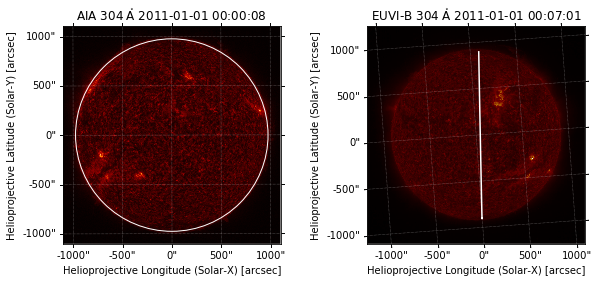

In [8]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1, projection=maps['AIA'])
maps['AIA'].plot(axes=ax1)
maps['AIA'].draw_limb()

ax2 = fig.add_subplot(1, 2, 2, projection=maps['EUVI'])
maps['EUVI'].plot(axes=ax2)
ax2.plot_coord(coords, color='w')

In [39]:
maps['AIA'].dsun

<Distance 1.47100674e+11 m>

In [47]:
type(maps['AIA'].coordinate_frame)

sunpy.coordinates.frames.Helioprojective

In [53]:
maps['EUVI'].coordinate_frame.observer

<HeliographicStonyhurst Coordinate (obstime=2011-01-01T00:07:01.811): (lon, lat, radius) in (deg, deg, m)
    (-89.58098377, 6.76626853, 1.58345292e+11)>

In [48]:
maps['AIA']

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 4
Detector:		 AIA
Measurement:		 304.0 Angstrom
Wavelength:		 304.0 Angstrom
Observation Date:	 2011-01-01 00:00:08
Exposure Time:		 2.901033 s
Dimension:		 [3674. 3674.] pix
Coordinate System:	 helioprojective
Scale:			 [0.600165 0.600165] arcsec / pix
Reference Pixel:	 [1837.360107 1837.619995] pix
Reference Coord:	 [0. 0.] arcsec
array([[-1,  2,  1, ..., -1, -1,  2],
       [ 0, -1, -1, ..., -1,  2, -2],
       [-2,  0, -1, ..., -1,  1,  0],
       ...,
       [-1,  1, -1, ...,  1, -3,  2],
       [ 1, -1,  1, ...,  0,  0, -1],
       [ 0,  1,  0, ...,  1,  0, -2]], dtype=int16)

# Map the other way -- STEREO coordinate grid back onto AIA

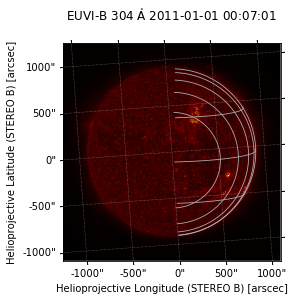

In [31]:
fig = plt.figure()
ax = plt.subplot(projection=maps['EUVI'])

maps['EUVI'].plot()

# Move the title so it does not clash with the extra labels
tx, ty = ax.title.get_position()
ax.title.set_position([tx, ty + 0.08])

# Change the default grid labels
stereo_x, stereo_y = ax.coords
stereo_x.set_axislabel("Helioprojective Longitude (STEREO B) [arscec]")
stereo_y.set_axislabel("Helioprojective Latitude (STEREO B) [arcsec]")

# Add a new coordinate overlay in the SDO frame
overlay = ax.get_coords_overlay(maps['AIA'].coordinate_frame)
overlay.grid()

# Configure the grid
x, y = overlay

# Set the ticks to be on the top and left axes
x.set_ticks_position('tr')
y.set_ticks_position('tr')

# Wrap the longitude at 180º rather than the default 360º
x.set_coord_type('longitude', 180.)

# Change the defaults to arcseconds
x.set_major_formatter('s.s')
y.set_major_formatter('s.s')

# Add axes labels
x.set_axislabel("Helioprojective Longitude (SDO) [arcsec]")
y.set_axislabel("Helioprojective Latitude (SDO) [arcsec]")
plt.show()